In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def sigmoid_activation(x):
    
    return 1.0/(1 + np.exp(-x))

In [3]:
def sigmoid_deriv(x):
    
    return x * (1 - x)

In [4]:
def predict(X, W):
    
    preds = sigmoid_activation(X .dot(W))
    
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1
    
    return preds

In [5]:
def next_batch(X, y, batchSize):
    
    for i in np.arange(0, X.shape[0], batchSize):
        yield(X[i:i+batchsize], y[i:i+batchSize])

In [6]:
#creating data points
(X, y) = make_blobs(n_samples = 1000, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 1)
y = y.reshape((y.shape[0], 1))

X = np.c_[X, np.ones((X.shape[0]))]

(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [7]:
#initializing weight matrix and list of losses

W = np.random.randn(X.shape[1], 1)
print(W.shape)
print(X.shape)
losses = []

(3, 1)
(1000, 3)


In [8]:
batchsize = 32
for epoch in np.arange(0, 100):
    
    epochLoss = []
    
    for (batchX, batchY) in next_batch(trainX, trainY, batchsize): #32 is batch size
        
        preds = sigmoid_activation(batchX.dot(W))
        
        error = preds - batchY
        
        epochLoss.append(np.sum(error **2))
        
        d = error * sigmoid_deriv(preds)
        gradient = batchX.T.dot(d)
        
        W += -0.1 * gradient      #0.1 is learning rate
    
    loss = np.average(epochLoss)
    losses.append(loss)
    
    if epoch == 0 or (epoch+1) % 5 == 0:
        print("[INFO] epoch = {}, loss = {:.7f}".format(int(epoch + 1), loss))

[INFO] epoch = 1, loss = 0.8124557
[INFO] epoch = 5, loss = 0.0210556
[INFO] epoch = 10, loss = 0.0146851
[INFO] epoch = 15, loss = 0.0116201
[INFO] epoch = 20, loss = 0.0097531
[INFO] epoch = 25, loss = 0.0084729
[INFO] epoch = 30, loss = 0.0075298
[INFO] epoch = 35, loss = 0.0068004
[INFO] epoch = 40, loss = 0.0062163
[INFO] epoch = 45, loss = 0.0057361
[INFO] epoch = 50, loss = 0.0053329
[INFO] epoch = 55, loss = 0.0049888
[INFO] epoch = 60, loss = 0.0046910
[INFO] epoch = 65, loss = 0.0044303
[INFO] epoch = 70, loss = 0.0041998
[INFO] epoch = 75, loss = 0.0039945
[INFO] epoch = 80, loss = 0.0038101
[INFO] epoch = 85, loss = 0.0036434
[INFO] epoch = 90, loss = 0.0034920
[INFO] epoch = 95, loss = 0.0033537
[INFO] epoch = 100, loss = 0.0032268


In [9]:
#evaluating Model

preds = predict(testX, W)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



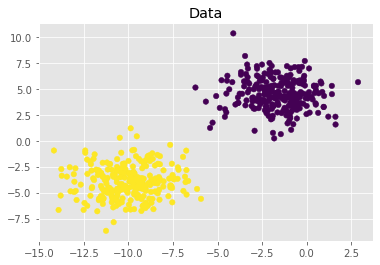

In [10]:
plt.style.use('ggplot')
plt.figure()
plt.title('Data')
plt.scatter(testX[:, 0], testX[:, 1], marker = 'o', c = testY[:, 0], s = 30)

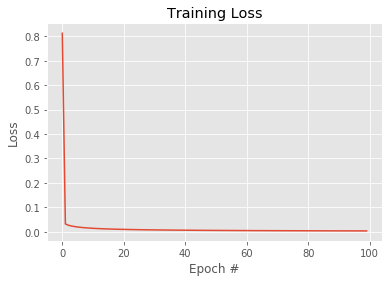

In [11]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100),losses)
plt.title('Training Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.show()